In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
dim_date = pd.read_csv("dim_date.csv")
ev_sales_makers = pd.read_csv("electric_vehicle_sales_by_makers.csv")
ev_sales_state = pd.read_csv("electric_vehicle_sales_by_state.csv")

# Data Cleaning

In [3]:
#Checking for missing values
print(dim_date.info())
print("-" * 60)
print(ev_sales_makers.info())
print(ev_sales_state.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes
None
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 colu

In [4]:
#checking for null values
print("Null Values in dim_date" , dim_date.isnull().sum())

print("Null Values in ev_sales_makers" , ev_sales_makers.isnull().sum())


print("Null Values in ev_sales_state" , ev_sales_state.isnull().sum())

Null Values in dim_date date           0
fiscal_year    0
quarter        0
dtype: int64
Null Values in ev_sales_makers date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
dtype: int64
Null Values in ev_sales_state date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64


In [5]:
dim_date.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [6]:
ev_sales_makers.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [7]:
ev_sales_state.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [8]:
#changing datatype of date
dim_date["date"] = pd.to_datetime(dim_date['date'])
ev_sales_makers["date"] = pd.to_datetime(ev_sales_makers['date'])
ev_sales_state["date"] = pd.to_datetime(ev_sales_state['date'])

# Data Exploration

###  Top and Bottom 2 Wheeler Makers

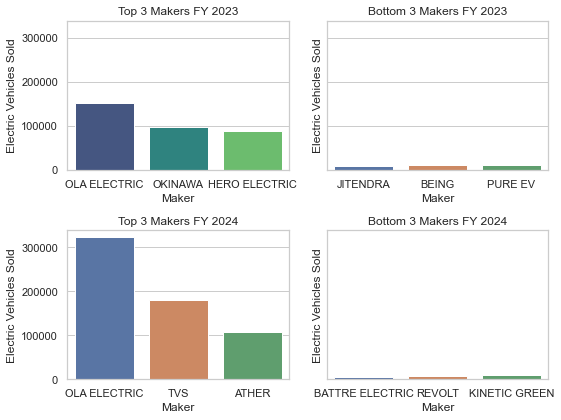

In [88]:
# Grouping and Filtering the data as per fiscal year
two_wheeler = ev_sales_makers[ev_sales_makers["vehicle_category"] == "2-Wheelers"].merge(dim_date, on="date")
two_wheeler_fy = two_wheeler[(two_wheeler["fiscal_year"] == 2023) | (two_wheeler["fiscal_year"] == 2024)]
top_bottom_makers = two_wheeler_fy.groupby(['fiscal_year','maker'])['electric_vehicles_sold'].sum().reset_index()


#Top and Bottom Makers for FY 2023 and 2024
top_3_makers_2023 = top_bottom_makers[top_bottom_makers['fiscal_year'] == 2023].nlargest(3,'electric_vehicles_sold')
top_3_makers_2024 = top_bottom_makers[top_bottom_makers['fiscal_year'] == 2024].nlargest(3,'electric_vehicles_sold')
bottom_3_makers_2023 = top_bottom_makers[top_bottom_makers['fiscal_year'] == 2023].nsmallest(3,'electric_vehicles_sold')
bottom_3_makers_2024 = top_bottom_makers[top_bottom_makers['fiscal_year'] == 2024].nsmallest(3,'electric_vehicles_sold')


#Plotting Top 3 and Bottom 3 Makers for FY 2023 and 2024

fig, axes = plt.subplots(2,2, figsize=(8,6), sharey= True)
palette = sns.color_palette("viridis", 3)  # Choose a color palette

sns.barplot(data=top_3_makers_2023, x="maker", y="electric_vehicles_sold", ax=axes[0,0],palette=palette)
axes[0, 0].set_title('Top 3 Makers FY 2023')
axes[0, 0].set_xlabel("Maker")
axes[0, 0].set_ylabel("Electric Vehicles Sold")

sns.barplot(data=bottom_3_makers_2023, x="maker", y="electric_vehicles_sold", ax=axes[0,1])
axes[0, 1].set_title('Bottom 3 Makers FY 2023')
axes[0, 1].set_xlabel("Maker")
axes[0, 1].set_ylabel("Electric Vehicles Sold")


sns.barplot(data=top_3_makers_2024, x="maker", y="electric_vehicles_sold", ax=axes[1,0])
axes[1, 0].set_title('Top 3 Makers FY 2024')
axes[1, 0].set_xlabel("Maker")
axes[1, 0].set_ylabel("Electric Vehicles Sold")


sns.barplot(data=bottom_3_makers_2024, x="maker", y="electric_vehicles_sold", ax=axes[1,1])
axes[1, 1].set_title('Bottom 3 Makers FY 2024')
axes[1, 1].set_xlabel("Maker")
axes[1, 1].set_ylabel("Electric Vehicles Sold")


plt.grid(False)
plt.tight_layout()
plt.show()

### Top 5 States with Higest Penetration Rate in 2-Wheeler and 4-Wheeler EV Sales in FY 2024

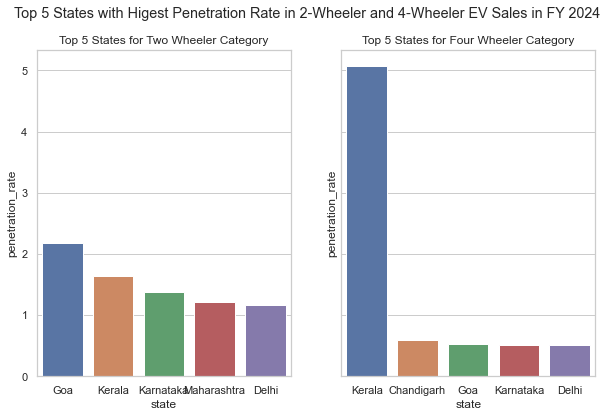

In [90]:
two_and_four_wheeler = ev_sales_state.merge(dim_date, on="date")
two_and_four_wheeler_fy = two_and_four_wheeler[two_and_four_wheeler['fiscal_year'] == 2024]

two_and_four_wheeler_fy['penetration_rate'] = two_and_four_wheeler_fy['electric_vehicles_sold'] / two_and_four_wheeler_fy['total_vehicles_sold']

top_bottom_states = two_and_four_wheeler_fy.groupby(['vehicle_category','state'])['penetration_rate'].sum().reset_index()
top_bottom_states


top_5_states_2_wheeler = top_bottom_states[top_bottom_states['vehicle_category'] == "2-Wheelers"].nlargest(5,"penetration_rate")
top_5_states_2_wheeler
top_5_states_4_wheeler = top_bottom_states[top_bottom_states['vehicle_category'] == "4-Wheelers"].nlargest(5,'penetration_rate')
top_5_states_4_wheeler

fig, axes = plt.subplots(1,2, figsize=(10,6), sharey= True)
fig.suptitle("Top 5 States with Higest Penetration Rate in 2-Wheeler and 4-Wheeler EV Sales in FY 2024")


sns.barplot(data=top_5_states_2_wheeler, x="state", y="penetration_rate", ax=axes[0])
axes[0].set_title("Top 5 States for Two Wheeler Category")

sns.barplot(data=top_5_states_4_wheeler, x="state", y="penetration_rate", ax=axes[1])
axes[1].set_title("Top 5 States for Four Wheeler Category")

plt.show()


### List the states with negative penetration (decline) in EV sales from 2022 to 2024?

In [11]:
# Filter for the relevant years
years = [2022, 2023, 2024]
states_data = ev_sales_state.merge(dim_date, on='date')
states_data = states_data[states_data['fiscal_year'].isin(years)]

# Calculate penetration rate for each year
states_data['penetration_rate'] = states_data['electric_vehicles_sold'] / states_data['total_vehicles_sold']
pivoted_data = states_data.pivot_table(index='state', columns='fiscal_year', values='penetration_rate', aggfunc='mean')

# Identify states with negative growth
pivoted_data['growth'] = pivoted_data[2024] - pivoted_data[2022]
negative_growth_states = pivoted_data[pivoted_data['growth'] < 0]

negative_growth_states

fiscal_year,2022,2023,2024,growth
state,,,,
Andaman & Nicobar Island,0.006483,0.003127,0.005924,-0.000560
Ladakh,0.026389,0.004612,0.020146,-0.006243


In [12]:
negative_growth_states

fiscal_year,2022,2023,2024,growth
state,,,,
Andaman & Nicobar Island,0.006483,0.003127,0.005924,-0.000560
Ladakh,0.026389,0.004612,0.020146,-0.006243


### What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?

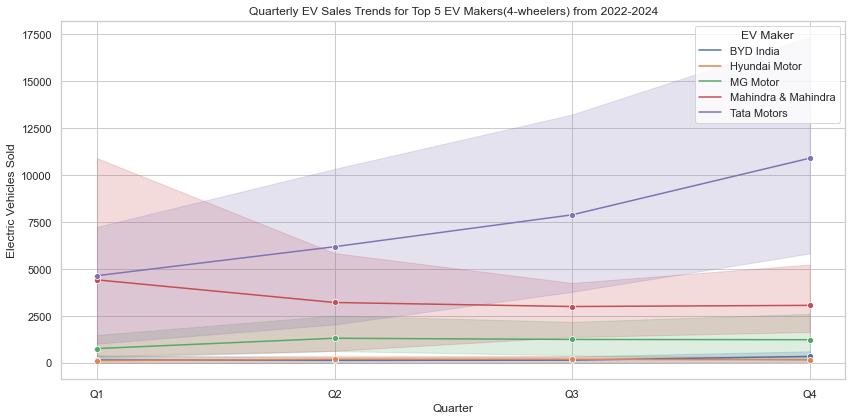

In [91]:
ev_makers_quarterly = ev_sales_makers.merge(dim_date, on="date")
ev_makers_quarterly_4w = ev_makers_quarterly[ev_makers_quarterly['vehicle_category'] == "4-Wheelers"]
ev_makers_quarterly_4w

ev_makers_quarterly_4w_sales = ev_makers_quarterly_4w.groupby(['fiscal_year','quarter','maker'])['electric_vehicles_sold'].sum().reset_index()
ev_makers_quarterly_4w_sales

#Identifying top 5 makers
top_makers = ev_makers_quarterly_4w_sales.groupby('maker')['electric_vehicles_sold'].sum().nlargest(5).index
top_quarterly_sales = ev_makers_quarterly_4w_sales[ev_makers_quarterly_4w_sales['maker'].isin(top_makers)]
top_quarterly_sales


#plotting

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_quarterly_sales, x='quarter', y='electric_vehicles_sold', hue='maker', marker='o')

plt.title('Quarterly EV Sales Trends for Top 5 EV Makers(4-wheelers) from 2022-2024')
plt.xlabel('Quarter')
plt.ylabel('Electric Vehicles Sold')
plt.legend(title='EV Maker')
plt.tight_layout()

plt.show()


In [14]:
top_makers

Index(['Tata Motors', 'Mahindra & Mahindra', 'MG Motor', 'BYD India',
       'Hyundai Motor'],
      dtype='object', name='maker')

### How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?

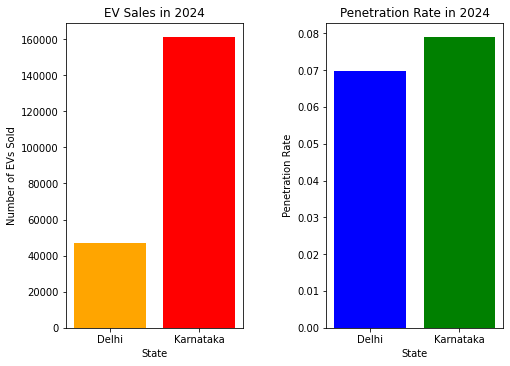

In [15]:
ev_sales_ker_delhi = ev_sales_state.merge(dim_date, on="date")
ev_sales_ker_delhi = ev_sales_ker_delhi[ev_sales_ker_delhi['fiscal_year'] == 2024]
ev_sales_ker_delhi['penetration_rate'] = ev_sales_ker_delhi['electric_vehicles_sold'] / ev_sales_ker_delhi['total_vehicles_sold']

ev_sales_karnataka = ev_sales_ker_delhi[ev_sales_ker_delhi['state'] == "Karnataka"]
ev_sales_delhi = ev_sales_ker_delhi[ev_sales_ker_delhi['state'] == "Delhi"]

ev_sales_karnataka



# Data for plotting
states = ['Delhi', 'Karnataka']
ev_sales = [ev_sales_delhi['electric_vehicles_sold'].sum(), ev_sales_karnataka['electric_vehicles_sold'].sum()]
penetration_rates = [ev_sales_delhi['penetration_rate'].mean(), ev_sales_karnataka['penetration_rate'].mean()]

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

# Bar chart for EV Sales
ax[0].bar(states, ev_sales, color=['orange', 'red'])
ax[0].set_title('EV Sales in 2024')
ax[0].set_xlabel('State')
ax[0].set_ylabel('Number of EVs Sold')

palette = sns.color_palette("deep", 3)
# Bar chart for Penetration Rate
ax[1].bar(states, penetration_rates, color=['blue', 'green'])
ax[1].set_title('Penetration Rate in 2024')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Penetration Rate')

# Show plot
plt.tight_layout(pad=4.0)
plt.show()


### List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

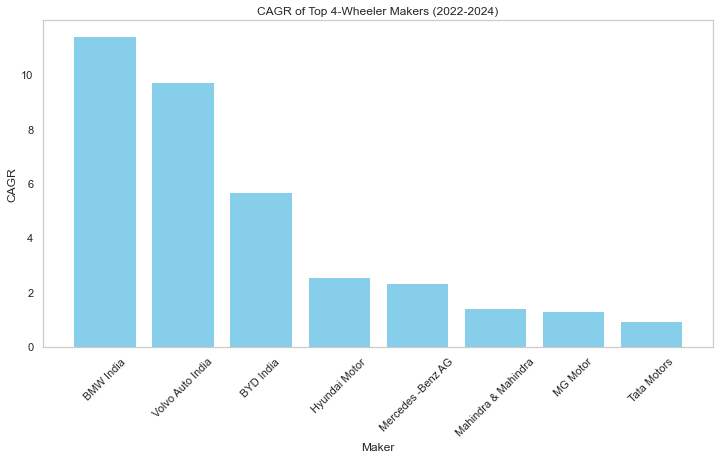

In [92]:
#Merging and filtering based on vehicle category
ev_sales_makers_date = ev_sales_makers.merge(dim_date, on="date")
ev_sales_makers_4w = ev_sales_makers_date[ev_sales_makers_date['vehicle_category'] == "4-Wheelers"]

#Aggregating Sales by Year
sales_by_year = ev_sales_makers_4w.groupby(['fiscal_year','maker'])['electric_vehicles_sold'].sum().reset_index()

#Creating Pivot table
sales_by_year_pivoted = sales_by_year.pivot(index='maker',columns='fiscal_year',values='electric_vehicles_sold').fillna(0)


#Function to calculate CAGR 
def calculate_cagr(initial, final,year):
    if initial == 0:
        return np.nan
    return (final/initial)**(1/year) -1


#Creating new dataframe for CAGR
cagr_results = pd.DataFrame(index=sales_by_year_pivoted.index)


#Calculating CAGR
cagr_results['CAGR'] = sales_by_year_pivoted.apply(lambda row : calculate_cagr(row[2022],row[2024],2), axis=1)
cagr_results = cagr_results.sort_values(by="CAGR",ascending=False)
cagr_results


#plotting
plt.figure(figsize=(12, 6))
plt.bar(cagr_results.index, cagr_results['CAGR'], color='skyblue')
plt.xlabel('Maker')
plt.ylabel('CAGR')
plt.title('CAGR of Top 4-Wheeler Makers (2022-2024)')
plt.xticks(rotation=45)
plt.grid(False)

plt.show()

### List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

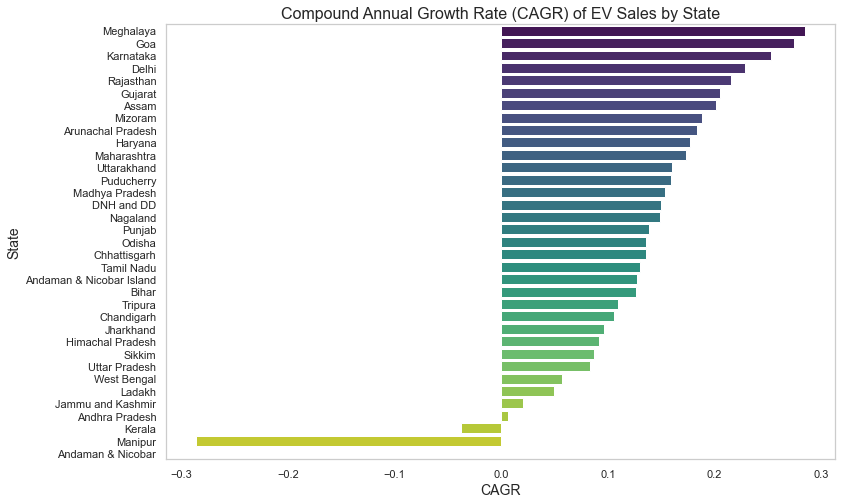

In [25]:
ev_sales_state_merged = ev_sales_state.merge(dim_date, on='date')
ev_sales_state_merged_states = ev_sales_state_merged[['state','total_vehicles_sold','fiscal_year']]
ev_sales_state_merged_states = ev_sales_state_merged_states.groupby(['state','fiscal_year'])['total_vehicles_sold'].sum().reset_index()
ev_sales_state_merged_states

#pivot tables
pivot_ev_sales = ev_sales_state_merged_states.pivot(index="state",columns='fiscal_year',values="total_vehicles_sold").fillna(0)
pivot_ev_sales


def calculate_cagr_states(initial, final,year):
    if initial == 0:
        return np.nan
    return (final/initial)**(1/year) -1


#Creating new dataframe for CAGR
cagr_results_overall = pd.DataFrame(index=pivot_ev_sales.index)


#Calculating CAGR
cagr_results_overall['CAGR'] = pivot_ev_sales.apply(lambda row : calculate_cagr_states(row[2022],row[2024],2), axis=1)
cagr_results_overall = cagr_results_overall.sort_values(by="CAGR",ascending=False)
cagr_results_overall


#plotting
sns.set(style="whitegrid")

# Create a horizontal bar plot for CAGR results
plt.figure(figsize=(12, 8))
plot = sns.barplot(x=cagr_results_overall['CAGR'], y=cagr_results_overall.index, palette='viridis', orient='h')

# Add labels and title
plt.xlabel('CAGR', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Compound Annual Growth Rate (CAGR) of EV Sales by State', fontsize=16)
plt.grid(False)

# Display the plot
plt.show()

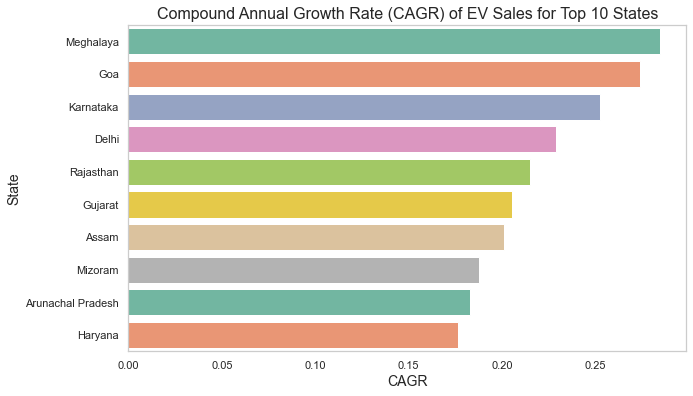

In [26]:
#plotting top 10 states
cagr_top10_states = cagr_results_overall.nlargest(10,'CAGR')
cagr_top10_states

plt.figure(figsize=(10, 6))
plot = sns.barplot(x=cagr_top10_states['CAGR'], y=cagr_top10_states.index, palette='Set2', orient='h')

# Add labels and title
plt.xlabel('CAGR', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Compound Annual Growth Rate (CAGR) of EV Sales for Top 10 States', fontsize=16)
plt.grid(False)
# Display the plot
plt.show()

### What are the peak and low season months for EV sales based on the data from 2022 to 2024?

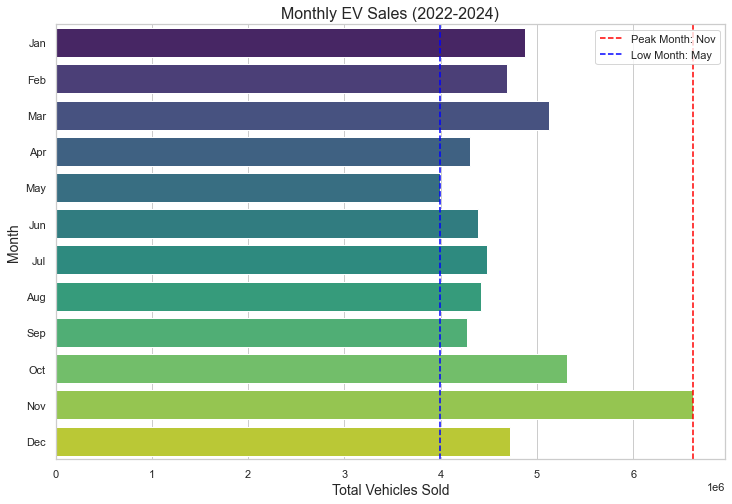

In [34]:
# Extracting Year and month
ev_sales_state['year'] = ev_sales_state['date'].dt.year
ev_sales_state['month'] = ev_sales_state['date'].dt.month

# Aggregate sales data by year and month
monthly_sales = ev_sales_state.groupby(['year', 'month'])['total_vehicles_sold'].sum().reset_index()

# Pivot the table to have years as columns and months as rows
pivot_monthly_sales = monthly_sales.pivot_table(index='month', columns='year', values='total_vehicles_sold', fill_value=0)

# Calculate total sales for each month across all years
total_sales_by_month = pivot_monthly_sales.sum(axis=1)

# Identify the peak and low months
peak_month = total_sales_by_month.idxmax()
low_month = total_sales_by_month.idxmin()

# Convert month numbers to month abbreviations
def month_number_to_abbreviation(month_number):
    return pd.to_datetime(f'2024-{month_number}-01').strftime('%b')

total_sales_by_month.index = total_sales_by_month.index.map(month_number_to_abbreviation)


#Plotting
plt.figure(figsize=(12, 8))
plot = sns.barplot(x=total_sales_by_month, y=total_sales_by_month.index, palette='viridis')

peak_month_name = month_number_to_abbreviation(peak_month)
low_month_name = month_number_to_abbreviation(low_month)

plt.axvline(x=total_sales_by_month[peak_month_name], color='red', linestyle='--', label=f'Peak Month: {peak_month_name}')
plt.axvline(x=total_sales_by_month[low_month_name], color='blue', linestyle='--', label=f'Low Month: {low_month_name}')

plt.xlabel('Total Vehicles Sold', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.title('Monthly EV Sales (2022-2024)', fontsize=16)
plt.legend()

plt.show()


### What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?

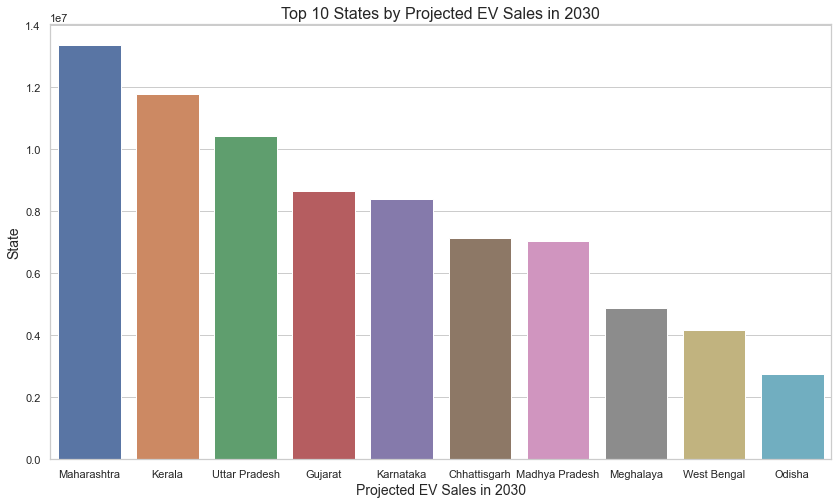

In [85]:
pd.set_option('display.float_format', '{:.4f}'.format)
ev_sales_year_wise = ev_sales_state.merge(dim_date, on="date")
ev_sales_year_wise = ev_sales_year_wise.groupby(['state','fiscal_year'])['electric_vehicles_sold'].sum().reset_index()
ev_sales_year_wise

pivot_ev_sales_future = ev_sales_year_wise.pivot(index='state', columns='fiscal_year',values='electric_vehicles_sold').fillna(0)



pivot_ev_sales_future['CAGR'] = pivot_ev_sales_future.apply(lambda row: calculate_cagr_states(row[2022], row[2024], 2), axis=1).fillna(0)
pivot_ev_sales_future = pivot_ev_sales_future.sort_values(by="CAGR",ascending=False).round(4)
pivot_ev_sales_future

top_10_states_future = pivot_ev_sales_future.head(10).index
top_10_states_future


#Projection
recent_year = 2024
future_year = 2030
years = future_year - recent_year

pivot_ev_sales_future['Projected_Sales_2030'] = pivot_ev_sales_future.apply(
    lambda row: row[recent_year] * ((1 + row['CAGR']) ** years), axis=1
)


top_10_states_projected_sales = pivot_ev_sales_future[['Projected_Sales_2030']].sort_values(by='Projected_Sales_2030', ascending=False).head(10).round(0)

# # pivot_ev_sales_future = pivot_ev_sales_future
top_10_states_projected_sales = top_10_states_projected_sales.reset_index()
top_10_states_projected_sales


# #plotting
plt.figure(figsize=(14, 8))
plot = sns.barplot(x='state', y='Projected_Sales_2030', data=top_10_states_projected_sales, palette='deep')

# Add labels and title
plt.xlabel('Projected EV Sales in 2030', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Top 10 States by Projected EV Sales in 2030', fontsize=16)

# Display the plot
plt.show()


In [84]:
top_10_states_projected_sales

fiscal_year,state,Projected_Sales_2030
0,Maharashtra,13351421.0000
1,Kerala,11778808.0000
2,Uttar Pradesh,10418069.0000
3,Gujarat,8646332.0000
4,Karnataka,8382593.0000
5,Chhattisgarh,7117936.0000
6,Madhya Pradesh,7036111.0000
7,Meghalaya,4889169.0000
8,West Bengal,4178832.0000
9,Odisha,2732641.0000
